# Does Fandango Inflate Movie Ratings?
This project will attempt to prove or disprove the following hypothesis about Fandango Movie Ratings:
* **Fandango inflates movie ratings.**

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# read in the data file from 2015
movie_ratings_15 = pd.read_csv('fandango_score_comparison.csv')

# read in the data file from 2016-2017
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

movie_ratings_15.head()
movie_ratings_16_17.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [3]:
movie_ratings_15_subset = movie_ratings_15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
movie_ratings_16_17_subset = movie_ratings_16_17[['movie', 'year', 'fandango']].copy()
movie_ratings_15_subset.head()
movie_ratings_16_17_subset.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [4]:
movie_below_3_16_17 = movie_ratings_16_17_subset[movie_ratings_16_17_subset['fandango'] < 3.0]
movie_below_3_16_17

,movie,year,fandango
50,Exposed,2016,2.5
54,Fifty Shades of Black,2016,2.5
66,"Hail, Caesar!",2016,2.5
170,The Darkness,2016,2.5
171,The Disappointments Room,2016,2.5
212,Zoolander 2,2016,2.5


In [5]:
movie_below_3_15 = movie_ratings_15_subset[movie_ratings_15['Fandango_Stars'] < 3.0]
movie_below_3_15

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference


The movies in these two datasets are not random samples. The movies are all highly-rated movie (no movie below a 3.0 rating). Therefore, these movies are not representative of the population.

Since these movies are not representative of the population, I am changing the goal of the analysis to something that will work well with the data.

New goal: **Does Fandango's rating have any difference between popular movies in 2015 compared to popular movies in 2016?**

According to Hickey, a movie is popular if it recieved at least 30 votes user votes. However, there is a problem with this definition as one of the datasets does not indicate how many user votes were recieved by a movie. 

One quick solution to this is take a random sample of n movies and check the number of user votes manually. If the number of movies that meet our criterion are above 50%, then we can move forwrd with a bit more confidece. 

In [6]:
movie_ratings_16_17_subset.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


90% of the movies above have more than 30 reviews, so we can move forward with this dataset.

In [7]:
movie_ratings_15_subset['Year'] = movie_ratings_15_subset['FILM'].str[-5:-1]
movie_ratings_15_subset['Year'].value_counts()     

2015    129
2014     17
Name: Year, dtype: int64

In [8]:
movie_ratings_15_subset['Year'] = movie_ratings_15_subset['Year'].astype(int)
movies_2015 = movie_ratings_15_subset[movie_ratings_15_subset['Year'] == 2015]
movies_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [9]:
movie_ratings_16_17_subset['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [10]:
movies_2016 = movie_ratings_16_17_subset[movie_ratings_16_17_subset['year'] == 2016]
movies_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


Text(0.5, 1.1, "Fandango's Film Ratings (2015 vs 2016)")

Text(0.5, 0, 'Stars')

(0, 5)

([<matplotlib.axis.XTick at 0x1be93db20f0>,
 <a list of 11 Text xticklabel objects>)

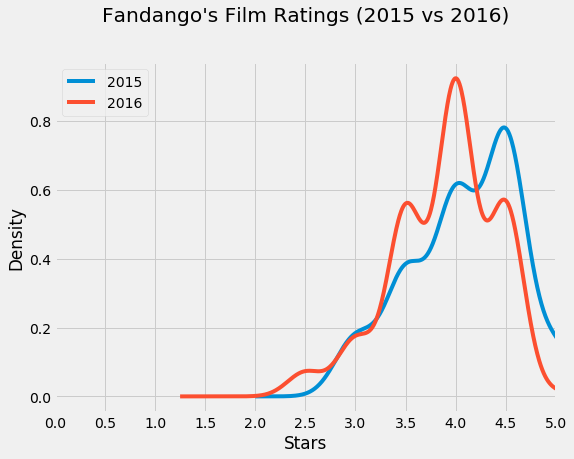

In [11]:
import numpy as np
%matplotlib inline
plt.style.use("fivethirtyeight")

movies_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8,6))
movies_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title("Fandango's Film Ratings (2015 vs 2016)", y = 1.1)
plt.xlabel('Stars')
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.1, step = 0.5))


## Analysis of the Distribution above

* The shape of both graphs is left-tailed, however the distribution for 2016 looks much different than 2015.
* The distribution for 2016 has strong resemblance with a normal distribution.
* Even though the distribution of ratings for popular movies in 2016 resembles a normal curve, it is still extremely skewed to the right. The highest peak is at 4 stars, whereas the highest peak for the 2015 distribution is at 4.5 stars. The difference is in the negative direction, meaning movies in 2016 were typically rated less than in 2015.


In [12]:
movies_2015['Fandango_Stars'].value_counts(normalize=True)*100
movies_2016['fandango'].value_counts(normalize=True)*100

4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64

4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64

It is now even more clear that there is a difference between the movie ratings in 2015 than the movie ratings in 2016.

The direction of the difference is negative in 2016 compared to 2015.

In [20]:
mean_2015 = movies_2015['Fandango_Stars'].mean()
mean_2016 = movies_2016['fandango'].mean()
diff_mean = abs(mean_2015 - mean_2016)
#print('Mean 2015: {}\nMean 2016: {}\nDifference: {}\n'.format(mean_2015, mean_2016, diff_mean))

median_2015 = movies_2015['Fandango_Stars'].median()
median_2016 = movies_2016['fandango'].median()
diff_median = abs(median_2015 - median_2016)
#print('Median 2015: {}\nMedian 2016: {}\nDifference: {}\n'.format(median_2015, median_2016, diff_median))


mode_2015 = movies_2015['Fandango_Stars'].mode()[0]
mode_2016 = movies_2016['fandango'].mode()[0]
diff_mode = abs(mode_2015 - mode_2016)
#print('Mode 2015: {}\nMode 2016: {}\nDifference: {}'.format(mode_2015, mode_2016, diff_mode))

summary_stats = pd.DataFrame()
summary_stats['2015'] = [mean_2015, median_2015, mode_2015]
summary_stats['2016'] = [mean_2016, median_2016, mode_2016]
summary_stats['Difference'] = abs(summary_stats['2015'] - summary_stats['2016'])
summary_stats['%_Diff'] = summary_stats['Difference'] / ((summary_stats['2015'] + summary_stats['2016']) / 2) * 100
summary_stats.index = ['Mean', 'Median', 'Mode']
round(summary_stats, 3)

,2015,2016,Difference,%_Diff
Mean,4.085,3.887,0.198,4.963
Median,4.000,4.000,0.000,0.000
Mode,4.500,4.000,0.500,11.765


([<matplotlib.axis.YTick at 0x1be94b155c0>,
 <a list of 11 Text yticklabel objects>)

Text(0.5, 1.0, 'Comparing summary statistics (2015 vs 2016)')

Text(0, 0.5, 'Stars')

(0, 5.5)

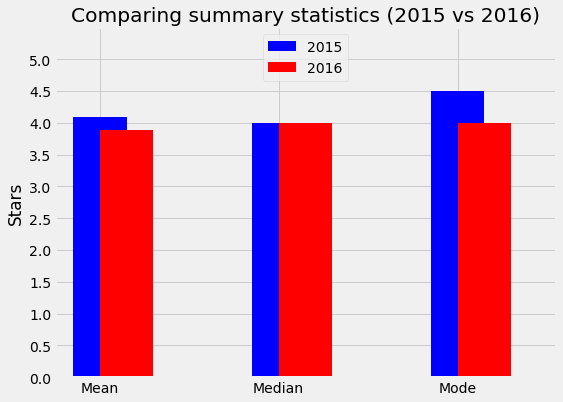

In [14]:
plt.style.use('fivethirtyeight')
summary_stats['2015'].plot.bar(color=['blue'], width=0.3, figsize=(8, 6))
summary_stats['2016'].plot.bar(color=['red'], align='edge', width=0.3, rot=0)
plt.legend(loc='upper center', fontsize='medium')
plt.yticks(np.arange(0, 5.1, step=0.5))
plt.title('Comparing summary statistics (2015 vs 2016)')
plt.ylabel('Stars')
plt.ylim(0, 5.5)
plt.show()

The chart above does indeed suggest that there is a slight difference in the ratings of popular movies in 2016 than in 2015. Popular movies in 2016 were typically rated slightly lower than popular movies in 2015. 

# Conclusion
The analysis above showed that there is indeed a difference in the ratings for popular movies in 2015 than in 2016. The analysis revealed that popular movies in 2016 were rated slightly lower than in 2015.

We cannot be fully sure what caused this difference, but it is quite possible that the bug that Hickey described in his [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) has been fixed.